In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-23 17:14:29.949580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-23 17:14:29.958472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-23 17:14:29.961137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 17:14:30.423765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_path = "../../data/adam_wbn"
image_path = "./images"
lr_to_p_fn = lambda js: np.sqrt(0.001/js["optimizer"]["lr"])
wd_to_log_fn = lambda js: np.log(js["optimizer"]["lambda_wd"])
p_to_p_fn = lambda js: js["norm"]["norm_multiply"]
acc_fn = lambda p : max_acc(get_stats(p,"test_stats"))

Max test accuracy of Standard is 86.14% with lr 0.002778
Max test accuracy of norm is 86.41% with p 3.4
Max test accuracy of cnorm is 86.07% with p 3.0
Max test accuracy of cnormu is 86.41% with p 3.2
Max test accuracy of gcstdu is 86.96% with p 3.6
Max test accuracy of wd is 85.32% with lambda 6.250000000000001e-08


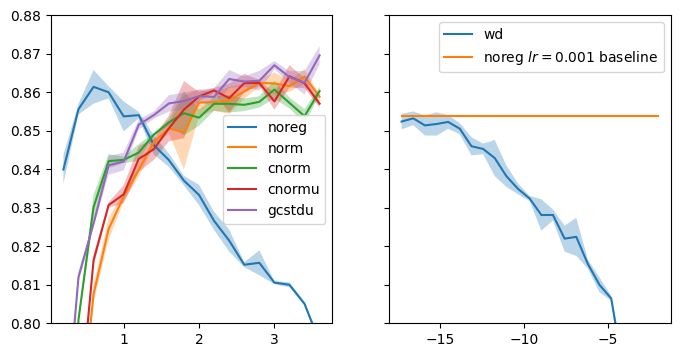

In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey="row")

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),lr_to_p_fn, acc_fn,axs[0], norm=False,label="noreg")
print("Max test accuracy of Standard is {0}% with lr {1}".format(round(100*y.max(),2),round(0.001/(x[y.argmax()]**2),6)))

for exp in ["norm","cnorm","cnormu","gcstdu"]:
    x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}",skip=lambda s : float(s.split("_")[0])>=4.0),p_to_p_fn,acc_fn, axs[0], norm=False, label=exp)
    print("Max test accuracy of {0} is {1}% with p {2}".format(exp,round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/wd"),wd_to_log_fn,acc_fn,axs[1], norm=False,label="wd")
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))

noreg_001_stats = get_stats(f"{data_path}/noreg/0.001","test_stats")
noreg_001_stats_y = np.mean(np.max(list(noreg_001_stats["acc"].values()),axis=0))

axs[1].plot([np.min(x),np.max(x)],[noreg_001_stats_y,noreg_001_stats_y],label=r"noreg $lr=0.001$ baseline")

axs[0].set_ylim(0.8,0.88)
fig.set_size_inches(8,4)
axs[0].legend()
axs[1].legend()

ax = axs.twiny()

In [9]:
writer = write(name="run",path=f"../../run",h=24,max_tasks=12)
for i in ["4.0","4.4","4.8","5.2"]:
    for setting in ["norm","cnorm","cnormu","gcstdu",
                    "norm_div4","cnorm_div4","cnormu_div4","gcstdu_div4",
                    "norm_div8","cnorm_div8","cnormu_div8","gcstdu_div8"]:
        with open(f"{data_path}/{setting}/3.6_1/settings.json", "r") as f:
            js = json.load(f)
        
        import subprocess
        print(" ".join(["rsync", "-a", f"./data/adam_wbn/{setting}/{i}_1/", f"hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/{setting}/{i}_1"]))

rsync -a ./data/adam_wbn/norm/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/norm/4.0_1
rsync -a ./data/adam_wbn/cnorm/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/cnorm/4.0_1
rsync -a ./data/adam_wbn/cnormu/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/cnormu/4.0_1
rsync -a ./data/adam_wbn/gcstdu/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/gcstdu/4.0_1
rsync -a ./data/adam_wbn/norm_div4/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/norm_div4/4.0_1
rsync -a ./data/adam_wbn/cnorm_div4/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/cnorm_div4/4.0_1
rsync -a ./data/adam_wbn/cnormu_div4/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/cnormu_div4/4.0_1
rsync -a ./data/adam_wbn/gcstdu_div4/4.0_1/ hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/gcstdu_div4/4.0_1
rsync -a ./data/adam_wbn/norm_div8/4.0_1/ hpc:/share

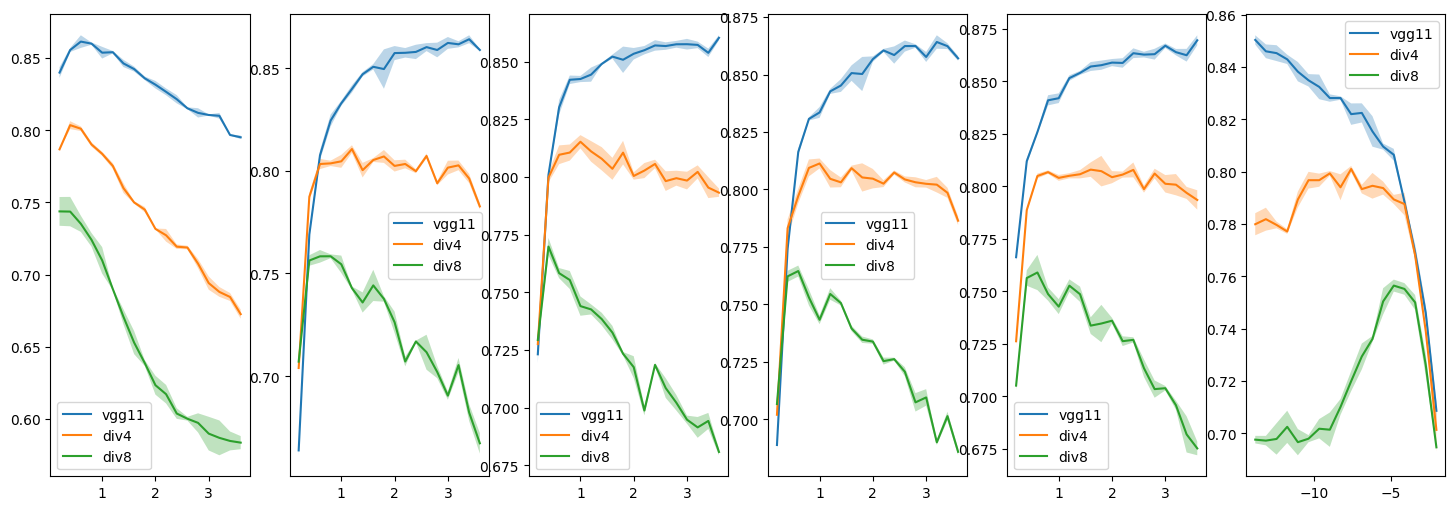

In [17]:
fig,axs = plt.subplots(ncols=6,nrows=1,sharey="col")
fig.set_size_inches(18,6)
for ax,exp,x_fn in zip(axs,["noreg","norm","cnorm","cnormu","gcstdu","wd"],[lr_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,wd_to_log_fn]):
    
    x,y,y_normed = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}"),x_fn,acc_fn, ax, "vgg11",norm=False)
    x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div4"),x_fn,acc_fn, ax, "div4",norm=False)
    x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div8"),x_fn,acc_fn, ax, "div8",norm=False)
    ax.legend()

In [ ]:
fig,axs = plot_data(f"{data_path}/noreg/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Means", d["cmean_mean"]) , 
                            1 :  
                                ("Variance of Channel Means", d["cmean_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Chan

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig(f"{image_path}/noreg_0.025_cmeans_cnorms.png", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/adam_wbn//noreg/0.025/states'